In [1]:
import pathlib
import xml.etree.ElementTree as ET

import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
# Check for varying image dimensions
dims = set()
for path in pathlib.Path("./original/Norway").glob("**/*.jpg"):
    image = Image.open(path)
    dims.add((image.width, image.height))
dims

{(3643, 2041), (3650, 2044), (4040, 2035)}

,D00,D10,D20,D40
0,8570,1730,468,461


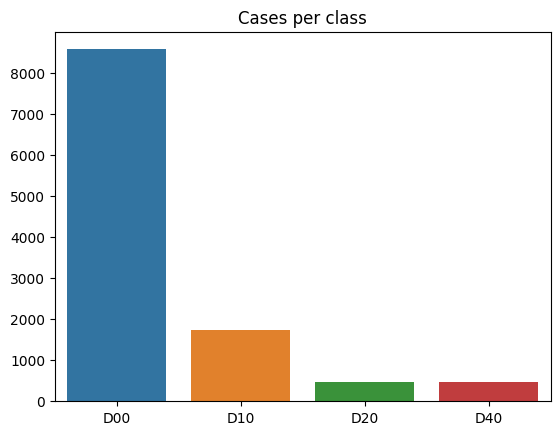

In [3]:
# Count cases of each class
counts = {"D00": 0, "D10": 0, "D20": 0, "D40": 0}
for path in pathlib.Path("./original/Norway/train/annotations/xmls").glob("*.xml"):
    tree = ET.parse(path)
    annotation = tree.getroot()
    for object in annotation.iter("object"):
        name = object.find("name").text
        counts[name] += 1
df = pd.DataFrame([counts])
sns.barplot(df).set(title="Cases per class")
df